In [1]:
technique = 'atacseq'
data_path = f"../data/ATAC_seq"
root_save_path = f"../saved_results/{technique}_new_trans_finetune_v2"
test_batches = ['s1d1', 's1d2', 's1d3', 's2d1', 's2d4', 's2d5', 's3d3', 's3d6', 's3d7',
       's3d10', 's4d1', 's4d8', 's4d9']
device = "cuda:0"

In [2]:
import scanpy as sc
adata_atac = sc.read_h5ad(f'{data_path}/atac_processed.h5ad')
adata_atac.X = adata_atac.X.toarray()
adata_atac.obs['label'] = list(adata_atac.obs['cell_type'])
adata_gex  = sc.read_h5ad(f'{data_path}/gex_processed.h5ad')
adata_gex.obs['label'] = list(adata_gex.obs['cell_type'])

def split_data(test_batch):
    adata_atac_train = adata_atac[adata_atac.obs['batch']!=test_batch]
    adata_atac_test  = adata_atac[adata_atac.obs['batch']==test_batch]

    adata_gex_train = adata_gex[adata_gex.obs['batch']!=test_batch]
    adata_gex_test  = adata_gex[adata_gex.obs['batch']==test_batch]

    return [adata_atac_train, adata_gex_train], [adata_atac_test, adata_gex_test]

In [3]:
adatas_train, adatas_test = split_data("s1d1")
adata_atac, adata_gex = adatas_train


In [4]:
import matplotlib.pyplot as plt
import numpy as np
print(np.unique(adatas_train[0].X))
print(np.any(np.isnan(adatas_train[1].X)))
print(np.any(np.isnan(adatas_train[0].X)))
gex = adatas_train[1].X
print(np.min(gex), np.max(gex))


[0. 1.]
False
False
-1.6383456 4.0


In [5]:
print(adatas_test[0].X.toarray().shape)
print(adatas_train[0].X.toarray().shape)
print(adatas_test[0])
print(adatas_train[0])
print(adatas_test[1])
# print(adatas_train[0])
print(adatas_train[1])
# print(adatas_train)

(6224, 13634)
(63025, 13634)
View of AnnData object with n_obs × n_vars = 6224 × 13634
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'label'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'hvg', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap', 'umap'
    layers: 'counts'
View of AnnData object with n_obs × n_vars = 63025 × 13634
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes',

In [6]:
assert adatas_train[0].obs['label'].equals(adatas_train[1].obs['label']) 
#assert adatas_train[0].var['label'].equals(adatas_train[1].var['label']) 
#print(adatas_train[1].var.keys())
#print(adatas_train[0].var.head())
#print(adatas_train[1].var.head())
#print(adatas_train[0].var.keys())
#print(adatas_train[1].var_names)
#print(adatas_train[0].obs.head())
#print(adatas_train[0].obs_names)
#print(adatas_train[0].to_df())
#print(adatas_train[0].obs["cell_type"].keys())
#print(adatas_train[0].to_df().head())
#print(adatas_train[0].obs["label"])
#print(adatas_train[0].obs.keys())
#print(adatas_train[1].to_df().head())

In [17]:

from unitednet.interface import UnitedNet
from unitednet.configs import atacseq_config

# multi-task

test_batch="s1d1"
adatas_train, adatas_test = split_data(test_batch)
model = UnitedNet("multitask", f"{root_save_path}/{test_batch}", device=device, technique=atacseq_config)
model.train(adatas_train)
model.finetune(adatas_train)
#model.evaluate(adatas_test)

training


  0%|          | 0/10 [00:00<?, ?it/s]

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_1.pt 



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[-0.00841954 -0.0066625 ]
                                [-0.00013403 -0.00013404]]
Confusion Matrix               [[ 1682     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     2     0     5     0     0     0     0]
                                [    0  9709    24     0     0     0     1     1   144     2     7     0
                                     0     2     1     0     0     1     1     0    28     1]
                                [    0     2  1824     0     0     0     0     0     0     0     1     0
                                     0     1     0     0     0     0     0     0     0     0]
                                [    0     0     0  4455

 10%|█         | 1/10 [01:13<11:02, 73.63s/it]

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_2.pt 



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.02309741  0.01102611]
                                [-0.00017588 -0.00017526]]
Confusion Matrix               [[ 1689     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    3  9881     7     0     0     1     1     0     4     0     0     1
                                     0     0     0     0     0     0     0     0    24     0]
                                [    0     1  1827     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4634

 20%|██        | 2/10 [02:17<09:04, 68.08s/it]

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_3.pt 



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.03512444  0.00762403]
                                [-0.00020005 -0.00020002]]
Confusion Matrix               [[ 1666     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0    23     0     0     0     0     0     0]
                                [    0  9910     8     0     0     0     0     0     0     0     2     0
                                     0     0     1     0     0     0     0     0     0     1]
                                [    0     1  1827     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4689

 30%|███       | 3/10 [03:21<07:42, 66.08s/it]

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/train_epoch_4.pt 



 30%|███       | 3/10 [03:53<09:05, 77.94s/it]


KeyboardInterrupt: 

In [18]:
atac_config_classification = {
    "train_batch_size": 512,
    "finetune_batch_size": 5000,
    "transfer_batch_size": 512,
    "train_epochs": 10,
    "finetune_epochs": 10,
    "transfer_epochs": 20,
    "train_task": "supervised_group_identification_only",
    "finetune_task": None,
    "transfer_task": None,
    "train_loss_weight": None,
    "finetune_loss_weight": None,
    "transfer_loss_weight": None,
    "lr": 0.01,
    "checkpoint": 1,
    "n_head": 1,
    "noise_level":[0,0],
    "fuser_type":"WeightedMean",
    "encoders": [
        {
            "input": 13634,
            "hiddens": [64, 64],
            "output": 64,
            "use_biases": [True, True, True],
            "dropouts": [0, 0, 0],
            "activations": ["relu", "relu", "relu"],
            "use_batch_norms": [True, True, True],
            "use_layer_norms": [False, False, False],
            "is_binary_input": True,
        },
        {
            "input": 4000,
            "hiddens": [64, 64],
            "output": 64,
            "use_biases": [True, True, True],
            "dropouts": [0, 0, 0],
            "activations": ["relu", "relu", "relu"],
            "use_batch_norms": [True, True, True],
            "use_layer_norms": [False, False, False],
            "is_binary_input": False,
        },
    ],
    "latent_projector": None,
    "decoders": [
        {
            "input": 64,
            "hiddens": [64, 64],
            "output": 13634,
            "use_biases": [True, True, True],
            "dropouts": [0, 0, 0],
            "activations": ["relu", "relu", "sigmoid"],
            "use_batch_norms": [False, False, False],
            "use_layer_norms": [False, False, False],
        },
        {
            "input": 64,
            "hiddens": [64, 64],
            "output": 4000,
            "use_biases": [True, True, True],
            "dropouts": [0, 0, 0],
            "activations": ["relu", "relu", None],
            "use_batch_norms": [False, False, False],
            "use_layer_norms": [False, False, False],
        },
    ],
    "discriminators": [
        {
            "input": 13634,
            "hiddens": [64],
            "output": 1,
            "use_biases": [True, True],
            "dropouts": [0, 0],
            "activations": ["relu", "sigmoid"],
            "use_batch_norms": [False, False],
            "use_layer_norms": [False, True],
        },
        {
            "input": 4000,
            "hiddens": [64],
            "output": 1,
            "use_biases": [True, True],
            "dropouts": [0, 0],
            "activations": ["relu", "sigmoid"],
            "use_batch_norms": [False, False],
            "use_layer_norms": [False, True],
        },
    ],
    "projectors": {
        "input": 64,
        "hiddens": [],
        "output": 100,
        "use_biases": [True],
        "dropouts": [0],
        "activations": ["relu"],
        "use_batch_norms": [False],
        "use_layer_norms": [True],
    },
    "clusters": {
        "input": 100,
        "hiddens": [],
        "output": 22,
        "use_biases": [False],
        "dropouts": [0],
        "activations": [None],
        "use_batch_norms": [False],
        "use_layer_norms": [False],
    },
}

test_batch="s1d1"
adatas_train, adatas_test = split_data(test_batch)
model_classification = UnitedNet("classification", f"{root_save_path}/{test_batch}/classification", device=device, technique=atac_config_classification)
model_classification.train(adatas_train)
model_classification.finetune(adatas_train)



training


  0%|          | 0/10 [00:00<?, ?it/s]

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/classification/train_epoch_1.pt 



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[-7.0702076  -7.34699345]
                                [-3.93558216 -6.49253798]]
Confusion Matrix               [[ 1687     0     0     0     0     1     0     0     0     0     0     0
                                     0     0     0     0     0     1     0     0     0     0]
                                [    0  9751    34     0     0     2     0     1    85     0    10     1
                                     0     0     0     0     1     0     1     0    35     1]
                                [    1     1  1825     0     0     0     0     0     0     0     1     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0   

 10%|█         | 1/10 [00:57<08:41, 57.96s/it]

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/classification/train_epoch_2.pt 



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[-6.94324827 -7.38384628]
                                [-4.02019548 -6.09490728]]
Confusion Matrix               [[ 1686     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     2     0     1     0     0     0     0]
                                [    0  9849    11     0     0     0     0     0    44     0     2     0
                                     0     0     0     0     0     0     0     0    16     0]
                                [    0     5  1823     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0   

 20%|██        | 2/10 [01:54<07:36, 57.10s/it]

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/classification/train_epoch_3.pt 



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[-7.01458549 -7.42023849]
                                [-4.8798604  -6.43017864]]
Confusion Matrix               [[ 1688     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     1     0     0     0     0     0     0]
                                [    0  9895    16     0     0     0     0     0     5     0     0     0
                                     0     0     0     0     0     0     0     0     4     2]
                                [    0     0  1828     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0   

 30%|███       | 3/10 [02:51<06:40, 57.22s/it]

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/classification/train_epoch_4.pt 



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[-7.01840067 -7.43424702]
                                [-4.49369955 -6.26851845]]
Confusion Matrix               [[ 1689     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9828     7     0     1     0     0     0    79     0     0     0
                                     0     0     0     0     0     0     0     0     6     1]
                                [    0     1  1827     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0   

 30%|███       | 3/10 [03:52<09:02, 77.54s/it]


KeyboardInterrupt: 

In [ ]:
model_classification.evaluate(adatas_test)

In [15]:
atac_config_translation = {
    "train_batch_size": 512,
    "finetune_batch_size": 5000,
    "transfer_batch_size": 512,
    "train_epochs": 10,
    "finetune_epochs": 10,
    "transfer_epochs": 20,
    "train_task": "cross_model_prediction",
    "finetune_task": None,
    "transfer_task": None,
    "train_loss_weight": None,
    "finetune_loss_weight": None,
    "transfer_loss_weight": None,
    "lr": 0.01,
    "checkpoint": 1,
    "n_head": 1,
    "noise_level":[0,0],
    "fuser_type":"WeightedMean",
    "encoders": [
        {
            "input": 13634,
            "hiddens": [64, 64],
            "output": 64,
            "use_biases": [True, True, True],
            "dropouts": [0, 0, 0],
            "activations": ["relu", "relu", "relu"],
            "use_batch_norms": [True, True, True],
            "use_layer_norms": [False, False, False],
            "is_binary_input": True,
        },
        {
            "input": 4000,
            "hiddens": [64, 64],
            "output": 64,
            "use_biases": [True, True, True],
            "dropouts": [0, 0, 0],
            "activations": ["relu", "relu", "relu"],
            "use_batch_norms": [True, True, True],
            "use_layer_norms": [False, False, False],
            "is_binary_input": False,
        },
    ],
    "latent_projector": None,
    "decoders": [
        {
            "input": 64,
            "hiddens": [64, 64],
            "output": 13634,
            "use_biases": [True, True, True],
            "dropouts": [0, 0, 0],
            "activations": ["relu", "relu", "sigmoid"],
            "use_batch_norms": [False, False, False],
            "use_layer_norms": [False, False, False],
        },
        {
            "input": 64,
            "hiddens": [64, 64],
            "output": 4000,
            "use_biases": [True, True, True],
            "dropouts": [0, 0, 0],
            "activations": ["relu", "relu", None],
            "use_batch_norms": [False, False, False],
            "use_layer_norms": [False, False, False],
        },
    ],
    "discriminators": [
        {
            "input": 13634,
            "hiddens": [64],
            "output": 1,
            "use_biases": [True, True],
            "dropouts": [0, 0],
            "activations": ["relu", "sigmoid"],
            "use_batch_norms": [False, False],
            "use_layer_norms": [False, True],
        },
        {
            "input": 4000,
            "hiddens": [64],
            "output": 1,
            "use_biases": [True, True],
            "dropouts": [0, 0],
            "activations": ["relu", "sigmoid"],
            "use_batch_norms": [False, False],
            "use_layer_norms": [False, True],
        },
    ],
    "projectors": {
        "input": 64,
        "hiddens": [],
        "output": 100,
        "use_biases": [True],
        "dropouts": [0],
        "activations": ["relu"],
        "use_batch_norms": [False],
        "use_layer_norms": [True],
    },
    "clusters": {
        "input": 100,
        "hiddens": [],
        "output": 22,
        "use_biases": [False],
        "dropouts": [0],
        "activations": [None],
        "use_batch_norms": [False],
        "use_layer_norms": [False],
    },
}

test_batch="s1d1"
adatas_train, adatas_test = split_data(test_batch)
model_translation = UnitedNet("translation", f"{root_save_path}/{test_batch}/translation", device=device, technique=atac_config_translation)
model_translation.train(adatas_train)
model_translation.finetune(adatas_train)


training


  0%|          | 0/10 [00:00<?, ?it/s]



Losses                   Value
-------------------  ---------
discriminator_loss   0.0552584
reconstruction_loss  0.352804
generator_loss       0.0114144
translation_loss     0.356408
contrastive_loss     1.73151
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/translation/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s1d1/translation/train_epoch_1.pt 



 10%|█         | 1/10 [00:39<05:54, 39.38s/it]



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[ 0.03479127  0.01706106]
                                [-0.00015064 -0.00015065]]
Confusion Matrix               [[   0    1    0    0    1   14    0    0    0    0    0    0    1    0
                                    0 1663    0    0    0    9    0    0]
                                [   0 5541    0    0  103    1    3   55    0    0    0    0    0    0
                                  222 3987    0    0    9    1    0    0]
                                [   0   57    0    0    2    1    0    0    0    0    0    0    0    0
                                    0 1766    0    0    1    1    0    0]
                                [   0    2    0   72 2650 1415    1   14    0    0    0    2    1    0
                                    2  529    0    0    1    1    0    0]
                                [

 20%|██        | 2/10 [01:23<05:35, 41.88s/it]



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[ 0.0450465   0.02271241]
                                [-0.00019148 -0.00019147]]
Confusion Matrix               [[   1    0    0    0    0   13    0    1    0    0    0    1    1    0
                                    6 1658    0    0    0    8    0    0]
                                [   0 1016    0    4    0    2    0    0    0    0   22  327   20    1
                                 4268 3732  530    0    0    0    0    0]
                                [   0   32    0    0    0    0    0    0    0    0    0    0    5    0
                                   10 1777    3    0    0    1    0    0]
                                [   0    1    0    8   12 1503    0    1    0    3    0   24    0    0
                                 2654  481    0    0    0    2    1    0]
                                [

 30%|███       | 3/10 [02:08<05:04, 43.54s/it]



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[ 0.04434713  0.02610903]
                                [-0.00023268 -0.00023276]]
Confusion Matrix               [[   2  149    0    0    0   12    0    3    0    0    0    0    1    0
                                    0 1514    0    0    0    8    0    0]
                                [   0 4127    0    0    0    1    2    1    0    2    7    0  347   86
                                  629 3504    0    0 1216    0    0    0]
                                [   0   24    0    0    0    1    0    1    0    0    0    0   11   17
                                    1 1769    0    0    3    1    0    0]
                                [   0 2581    0   13   52 1546    1    7    0    0    0    0    0    0
                                   21  451   16    0    1    1    0    0]
                                [

 40%|████      | 4/10 [02:55<04:28, 44.76s/it]



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[ 0.04412154  0.02483439]
                                [-0.0002613  -0.00026115]]
Confusion Matrix               [[   0 1519    1    0    0  138    0   12    0    0    0    0    0    0
                                    0   14    0    0    0    5    0    0]
                                [   0 4891  249    1    2 2826    0    1    2   27    0    0  593    0
                                  505    0    9    0  812    4    0    0]
                                [   0 1795   16    0    0    4    0    1    0    1    0    0    7    0
                                    2    1    0    0    1    0    0    0]
                                [   0  470    0  251   46 2116  125 1448    0    0    0    0    0    0
                                   10    3   45    0    0  176    0    0]
                                [

 50%|█████     | 5/10 [03:39<03:42, 44.45s/it]



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[ 0.04637673  0.02794038]
                                [-0.00023069 -0.00023137]]
Confusion Matrix               [[   0 1555    0  102    0   10    0    0    0    0    0    0   10    0
                                    0    0    0    0    0   12    0    0]
                                [   0 4413  250 3189    0    1    0    0  336   10    0    0    7    0
                                  778    0    3    0  932    0    3    0]
                                [   0 1792   17   12    0    0    0    0    1    0    0    0    1    0
                                    2    0    0    0    1    1    1    0]
                                [   0  394   10 2565   14 1468   72    0    0    0    0   54   64    0
                                   10    0   16    0    1   16    0    6]
                                [

 60%|██████    | 6/10 [04:20<02:54, 43.52s/it]



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[0.044974   0.02768555]
                                [0.00731563 0.00784281]]
Confusion Matrix               [[   0 1542    0    0    2    9    0    2    0    0    0    0    5    0
                                  115    0    0    0    0   14    0    0]
                                [   0 4317  306  187    0    2    0    0   11    0   14  879   35    0
                                 3174    0    9    0  988    0    0    0]
                                [   0 1790    8   10    0    0    0    0    1    0    0    3    2    0
                                   10    0    1    0    2    1    0    0]
                                [   0  384    4   76  228 1221   19   27    0    0    0   13  118    0
                                 2478    0   27    1    2   87    5    0]
                                [   0

 70%|███████   | 7/10 [05:02<02:09, 43.04s/it]



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[0.0461034  0.02851833]
                                [0.02673943 0.02863973]]
Confusion Matrix               [[   1 1466    0  110    2   79    1    0    0    0    0    8    6    0
                                    0    0    0    0    0   16    0    0]
                                [   0 4327  341 3248    0    2    0    0  166    0    6  873   23    0
                                    0    0   45    6  885    0    0    0]
                                [   0 1793   18    9    0    0    0    0    1    0    0    3    1    0
                                    0    0    1    0    1    1    0    0]
                                [  12  407   44 2509  154 1380    6    0    0    0    0   12  105    0
                                    5    0   40    0    1   15    0    0]
                                [  11

 80%|████████  | 8/10 [05:45<01:26, 43.02s/it]



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[0.04496785 0.02888957]
                                [0.05951121 0.06251566]]
Confusion Matrix               [[  19 1263    0  176    2  107    0    0    0    0    0    0    8    0
                                   99    0    1    0    0   13    0    1]
                                [   0 4347  309 3237    0    3    0    0    6   21    0    0   44    0
                                  858    0    5    0  816    0  276    0]
                                [   0 1789   18   10    0    1    0    0    0    0    0    0    4    0
                                    2    0    0    0    1    1    2    0]
                                [   1  411   58 2562  226 1255   19    0    0    0    0    0   54    1
                                   22    0   33    0    4   40    1    3]
                                [   2

 90%|█████████ | 9/10 [06:26<00:42, 42.39s/it]



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[0.04524274 0.02537511]
                                [0.06674971 0.07014192]]
Confusion Matrix               [[ 283 1003    1  293    0   83    0    0    1    0    0    0    4    0
                                    0    0    2    5    0   14    0    0]
                                [ 856 4365  242 3239    0    2    0    0    3    0   18    0   45    0
                                    0    0   14    0  832    0  305    1]
                                [   1 1791   10   12    0    1    0    0    0    0    0    0    3    0
                                    0    0    0    0    1    1    8    0]
                                [  20  394   43 2566   11 1284  179    0    8    0    0    0   80    2
                                    0    0   55    6    3   36    3    0]
                                [   2

100%|██████████| 10/10 [07:15<00:00, 43.56s/it]



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[0.04387981 0.0282407 ]
                                [0.06946294 0.07474364]]
Confusion Matrix               [[   1  947    0  509    2   42    1    9    0    0    0    1    6    0
                                  157    0    1    0    0   13    0    0]
                                [   5 4333  307 3252    0    2  262    0    0    0    0    0   63   15
                                  835    0   16    0  832    0    0    0]
                                [   0 1789    7   12    0    2   12    0    0    0    0    0    3    0
                                    1    0    0    0    1    1    0    0]
                                [   5  394    2 2560  269 1258   43    3    0    0    0    5   69    0
                                   16    0   28    7   16   15    0    0]
                                [   3

In [ ]:
model_translation.evaluate(adatas_test)

##### Train

In [11]:
import sys
from unitednet.interface import UnitedNet
from unitednet.configs import *

In [12]:
test_batches = ['s4d9']

In [13]:
for test_batch in test_batches:
    print(test_batch)
    adatas_train, adatas_test = split_data(test_batch)
    model = UnitedNet(f"{root_save_path}/{test_batch}", device=device, technique=atacseq_config)
    model.train(adatas_train, verbose=True)
    model.finetune(adatas_train, verbose=True)
    model.transfer(adatas_train, adatas_transfer = adatas_test, verbose=True)
    print(model.evaluate(adatas_test))


s4d9
training


  0%|          | 0/10 [00:00<?, ?it/s]



Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0251619
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_epoch_1.pt 



 10%|█         | 1/10 [00:52<07:49, 52.14s/it]



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[-0.0182849  -0.01800969]
                                [-0.00016603 -0.00016603]]
Confusion Matrix               [[1590    0    0    0    0    0    0    0    0    0    0    0    0    0
                                    0    0    0    1    0    0    0    0]
                                [   0 9875   11    0    0    0    0    0   19    0    6    4    0    0
                                    0    0    0    0    1    0    6    0]
                                [   0    4 1669    0    0    0    0    0    0    0    0    0    0    0
                                    0    0    0    0    1    0    0    0]
                                [   0    0    0 4436   86   14    0    0    0    0    0    0    4    0
                                    0    0    0    1    0    0    0    0]
                                [

 20%|██        | 2/10 [01:40<06:38, 49.77s/it]



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[ 0.01797292  0.00865755]
                                [-0.0001852  -0.00018508]]
Confusion Matrix               [[1588    0    0    0    0    0    0    0    0    0    0    0    0    0
                                    0    1    0    2    0    0    0    0]
                                [   0 9896    9    0    1    1    0    0    2    0    4    2    0    0
                                    0    1    0    0    1    0    5    0]
                                [   0    1 1672    0    0    0    0    0    0    0    0    0    0    1
                                    0    0    0    0    0    0    0    0]
                                [   1    1    0 4358  107   40    0    2    0    0    0   25    0    0
                                    5    0    0    2    0    0    0    0]
                                [

 30%|███       | 3/10 [02:28<05:43, 49.05s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.02350857  0.01546423]
                                [-0.00020694 -0.00020694]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9910     6     0     0     0     0     0     3     0     2     0
                                     0     0     0     0     0     0     0     0     0     1]
                                [    0     0  1673     0     0     0     0     0     1     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4527     5     4     0     1     0     0     0     4
                                     

 40%|████      | 4/10 [03:16<04:52, 48.69s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.02929778  0.01817152]
                                [-0.00021386 -0.00021351]]
Confusion Matrix               [[ 1563     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0    26     0     0     0     2     0     0]
                                [    0  9885     6     0     0     0     0     0    19     0     0     0
                                     0     0     0     0     0     0     0     0    12     0]
                                [    0     4  1669     0     0     0     0     0     1     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4533     8     0     0     0     0     0     0     0
                                     

 50%|█████     | 5/10 [04:04<04:02, 48.44s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.03496658  0.01741543]
                                [-0.00024096 -0.00024058]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9902     8     0     1     0     0     0     1     0     0     0
                                     0     1     0     0     0     0     0     0     9     0]
                                [    0     0  1673     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     1     0]
                                [    0     0     0  4536     4     1     0     0     0     0     0     0
                                     

 60%|██████    | 6/10 [05:02<03:27, 51.77s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.0323378   0.00787778]
                                [-0.00024437 -0.00024119]]
Confusion Matrix               [[ 1590     0     1     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9910     7     0     0     0     0     0     1     0     0     0
                                     0     0     0     0     0     0     0     0     4     0]
                                [    0     0  1673     0     0     0     0     0     0     0     1     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     

 70%|███████   | 7/10 [05:53<02:34, 51.41s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.03762881  0.01993074]
                                [-0.00023753 -0.00023753]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9915     6     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     1     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     

 80%|████████  | 8/10 [06:54<01:49, 54.51s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.04146294  0.02132029]
                                [-0.00025515 -0.00025516]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9917     4     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     1     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     

 90%|█████████ | 9/10 [07:56<00:56, 56.85s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.03366089  0.01793089]
                                [-0.00026905 -0.00026827]]
Confusion Matrix               [[ 1589     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     2     0     0     0     0     0     0]
                                [    0  9914     5     0     1     0     0     0     0     0     1     0
                                     0     0     0     0     0     0     0     0     0     1]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4532     3     4     0     0     0     0     0     0
                                     

100%|██████████| 10/10 [08:55<00:00, 53.58s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.03720971  0.01917499]
                                [-0.00026045 -0.00026036]]
Confusion Matrix               [[ 1590     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     1     0     0     0     0     0     0]
                                [    0  9867    43     1     0     0     0     0     7     1     0     0
                                     1     0     0     0     0     0     0     0     1     1]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4534     2     2     0     0     0     3     0     0
                                     

finetuning


  0%|          | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
translation_loss     0.356378
contrastive_loss     0.908306
reconstruction_loss  0.352277
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_epoch_1.pt 



 10%|█         | 1/10 [01:02<09:21, 62.34s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.04149254  0.0217631 ]
                                [-0.00013919 -0.00013919]]
Confusion Matrix               [[ 1589     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     2     0     0     0     0     0     0]
                                [    0  9920     1     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     1     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     

 20%|██        | 2/10 [02:04<08:18, 62.31s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 4.21929508e-02  2.22002920e-02]
                                [-7.01619065e-05 -7.01619356e-05]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9921     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     1     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                     

 30%|███       | 3/10 [03:02<07:00, 60.14s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 4.19973880e-02  2.29142867e-02]
                                [-6.53544848e-05 -6.53544848e-05]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9921     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     1     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                     

 40%|████      | 4/10 [03:52<05:37, 56.22s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 4.22426052e-02  2.28518285e-02]
                                [-5.04706368e-05 -5.04706368e-05]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9921     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     1]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                     

 50%|█████     | 5/10 [04:42<04:29, 53.99s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 4.20964584e-02  2.25371569e-02]
                                [-5.78652762e-05 -5.78669315e-05]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9918     0     0     0     0     0     0     1     0     0     0
                                     2     0     0     0     0     0     0     0     0     1]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                     

 60%|██████    | 6/10 [05:34<03:33, 53.44s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 4.30738367e-02  2.26067342e-02]
                                [-4.64071636e-05 -4.64071636e-05]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4539     2     0     0     0     0     0     0     0
                     

 70%|███████   | 7/10 [06:25<02:37, 52.39s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 4.34231162e-02  2.28417236e-02]
                                [-5.40284673e-05 -5.40319961e-05]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                     

 80%|████████  | 8/10 [07:15<01:43, 51.85s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 4.37934175e-02  2.25476287e-02]
                                [-7.71232808e-05 -5.64558504e-05]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                     

 90%|█████████ | 9/10 [08:15<00:54, 54.18s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 4.36905622e-02  2.31445786e-02]
                                [-5.80681262e-05 -5.80681262e-05]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                     

100%|██████████| 10/10 [09:18<00:00, 55.83s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 4.42524180e-02  2.34230924e-02]
                                [-6.02554392e-05 -6.02554392e-05]]
Confusion Matrix               [[ 1590     0     0     0     1     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                     

transferring


  0%|          | 0/20 [00:00<?, ?it/s]



Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00291886
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_1.pt 



  5%|▌         | 1/20 [00:57<18:17, 57.76s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.03700424  0.00920729]
                                [-0.00047083 -0.00047063]]
Confusion Matrix               [[ 1590     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     1     0     0     0     0     0     0]
                                [    0  9920     0     0     0     0     0     0     2     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4538     1     2     0     0     0     0     0     0
                                     

 10%|█         | 2/20 [01:54<17:12, 57.39s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.02576643  0.00546234]
                                [-0.00046723 -0.00046723]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9917     0     0     0     0     0     0     1     0     0     0
                                     0     0     0     0     0     0     4     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     

 10%|█         | 2/20 [02:27<22:03, 73.54s/it]


KeyboardInterrupt: 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch

/home/katzalis/thesis/UnitedNet/src/interface.py:143: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model = torch.load(path,map_location=torch.device(device))


/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


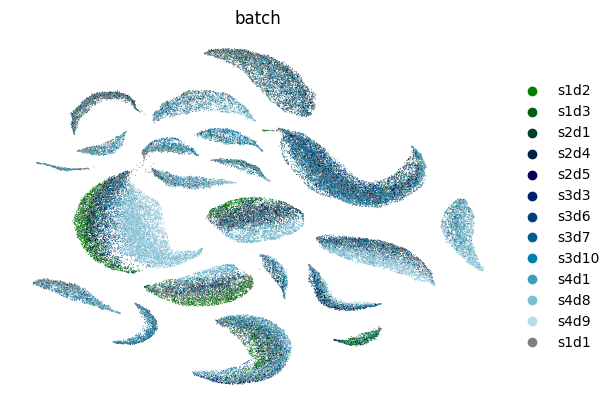

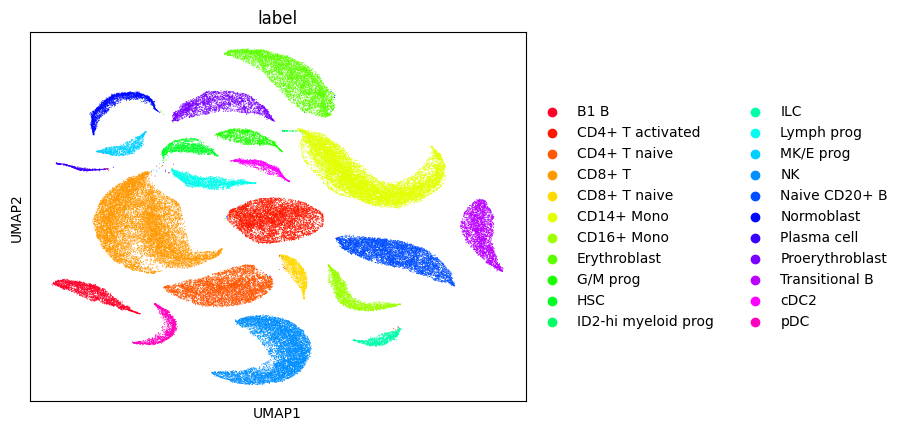

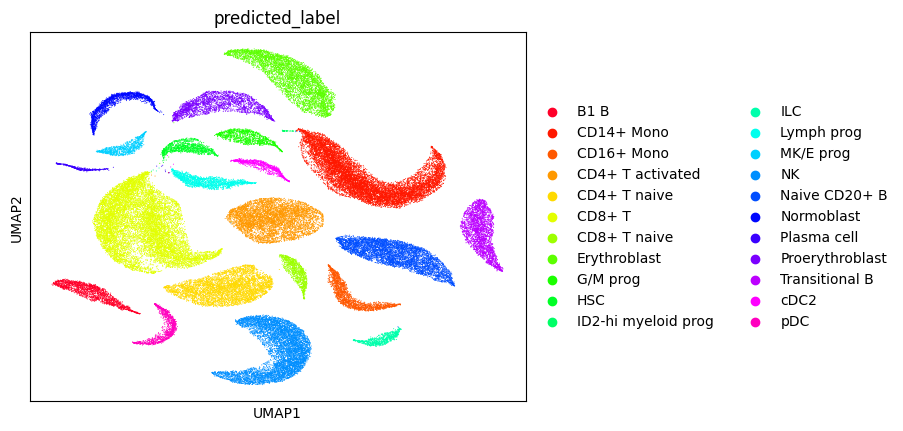

/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


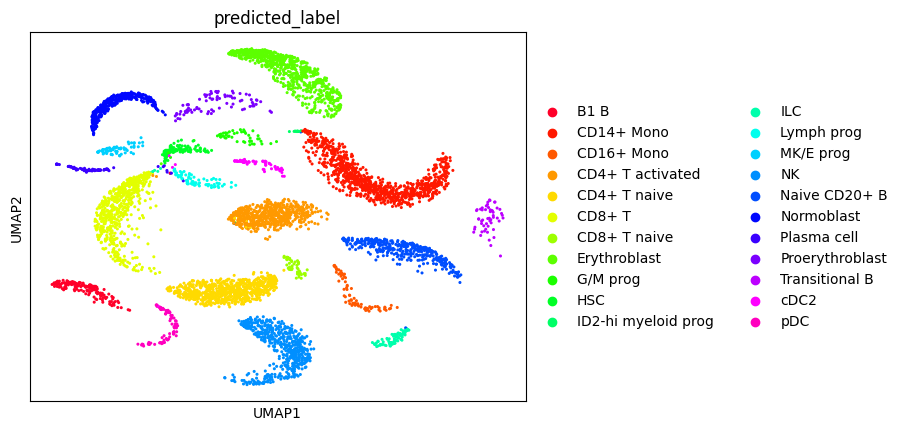

In [10]:
import scanpy as sc 
for test_batch in ['s1d1']:
    model = UnitedNet(f"{root_save_path}/{test_batch}", device=device, technique=atacseq_config)
    model.load_model(f"{root_save_path}/{test_batch}/transfer_best.pt",device=torch.device(device))
    model.model.device_in_use = device
    adatas = [adata_atac, adata_gex]
    adata_all = model.infer(adatas)
    adata_all.obs['batch'] = list(adatas[0].obs['batch'])
    adata_all.obs['label'] = list(adatas[0].obs['label'])

    cmap_wt = plt.get_cmap('ocean')
    new_cmap = list(cmap_wt(np.linspace(0, 0.91, 12)))
    size_umap = 120000 / adatas[0].shape[0]

    fig,ax=plt.subplots()
    ax = sc.pl.umap(adata_all[adata_all.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
    sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
               ax=ax,save=f'ATACseq_{test_batch}_batch_label.pdf')

    fig,ax=plt.subplots()
    sc.pl.umap(adata_all,color=['label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
               ax=ax,save=f'ATACseq_{test_batch}_gt_label.pdf')

    fig,ax=plt.subplots()
    sc.pl.umap(adata_all,color=['predicted_label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
               ax=ax,save=f'ATACseq_{test_batch}_predict_label.pdf')
    fig,ax=plt.subplots()
    sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['predicted_label'],frameon = True,palette='gist_rainbow',
           ax=ax,save=f'ATACseq_{test_batch}_batch_label_test.pdf')

/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


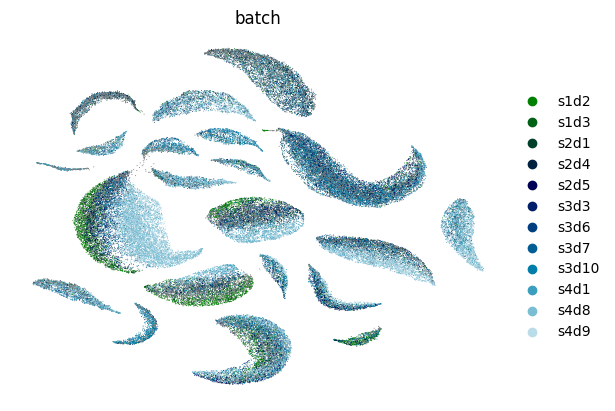

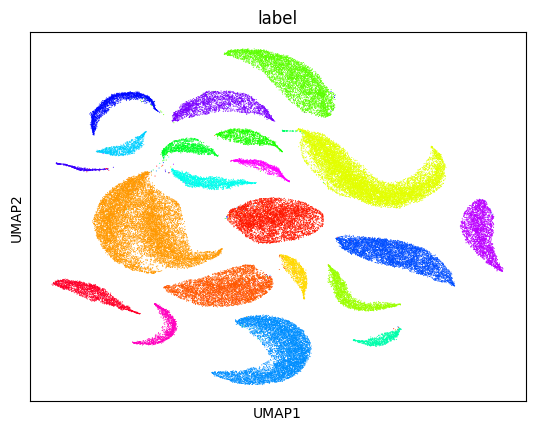

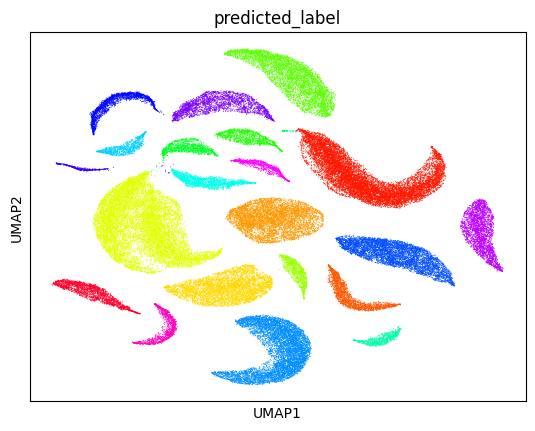

/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


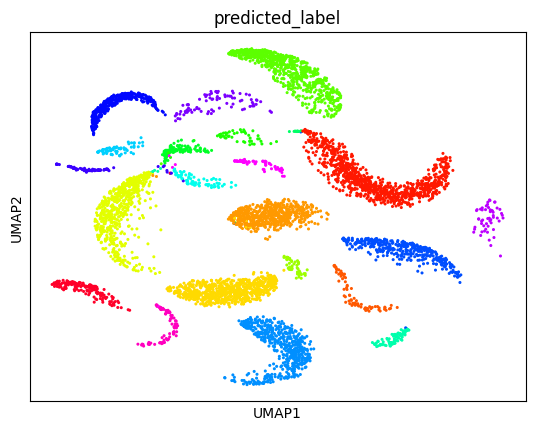

In [11]:
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 1200
fig,ax=plt.subplots()
ax = sc.pl.umap(adata_all[adata_all.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
           ax=ax,save=f'ATACseq_{test_batch}_batch_label.png',legend_loc =None)

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'ATACseq_{test_batch}_gt_label.png',legend_loc =None)

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['predicted_label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'ATACseq_{test_batch}_predict_label.png',legend_loc =None)
fig,ax=plt.subplots()
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['predicted_label'],frameon = True,palette='gist_rainbow',
       ax=ax,save=f'ATACseq_{test_batch}_batch_label_test.png',legend_loc =None)

/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


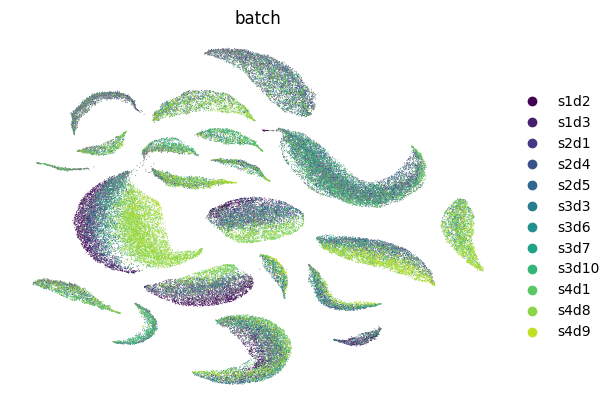

In [12]:
cmap_wt = plt.get_cmap('viridis')
new_cmap = list(cmap_wt(np.linspace(0, 0.91, 12)))
fig,ax=plt.subplots()
ax = sc.pl.umap(adata_all[adata_all.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
           ax=ax,save=f'ATACseq_{test_batch}_batch_label.png',legend_loc =None)


/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


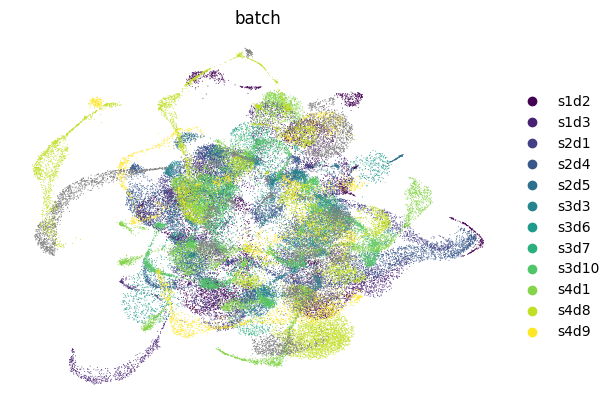

: 

In [21]:

cmap_wt = plt.get_cmap('viridis')
new_cmap = list(cmap_wt(np.linspace(0, 1, 12)))
fig,ax=plt.subplots()
ax = sc.pl.umap(adata_atac[adata_atac.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
sc.pl.umap(adata_atac[adata_atac.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
           ax=ax,save=f'ATACseq_{test_batch}_batch_label_atac_only.png',legend_loc =None)


/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


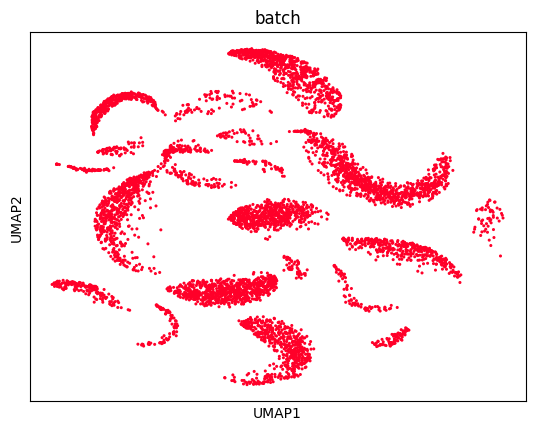

In [19]:
fig,ax=plt.subplots()
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],frameon = True,palette='gist_rainbow',
       ax=ax,save=f'ATACseq_{test_batch}_batch_label_test_colored_batch.png',legend_loc =None)

/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


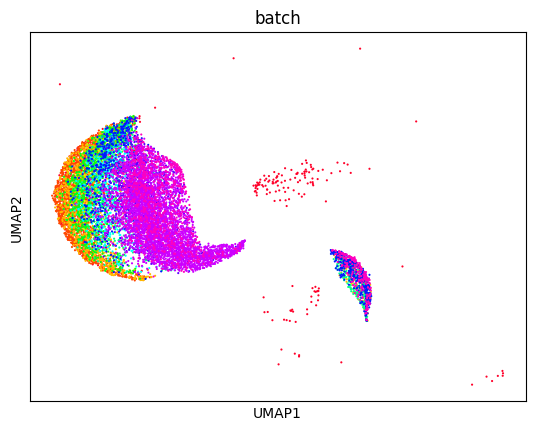

In [20]:
fig,ax=plt.subplots()
sc.pl.umap(adata_all[adata_all.obs['label'].isin(['CD8+ T','CD8+ T naive'])],color=['batch'],frameon = True,palette='gist_rainbow',
       ax=ax,save=f'ATACseq_{test_batch}_CD8T_position.png',legend_loc =None)

In [15]:
import pandas as pd
adata_atac.var_names = np.append(pd.read_csv(f'{data_path}/annotated_ATAC_gene_names_10k.csv').iloc[:,0].values,'unknown')
adata_atac.var_names_make_unique()
adata_atac.var_names = adata_atac.var_names.astype(str)

CD8_T_cells


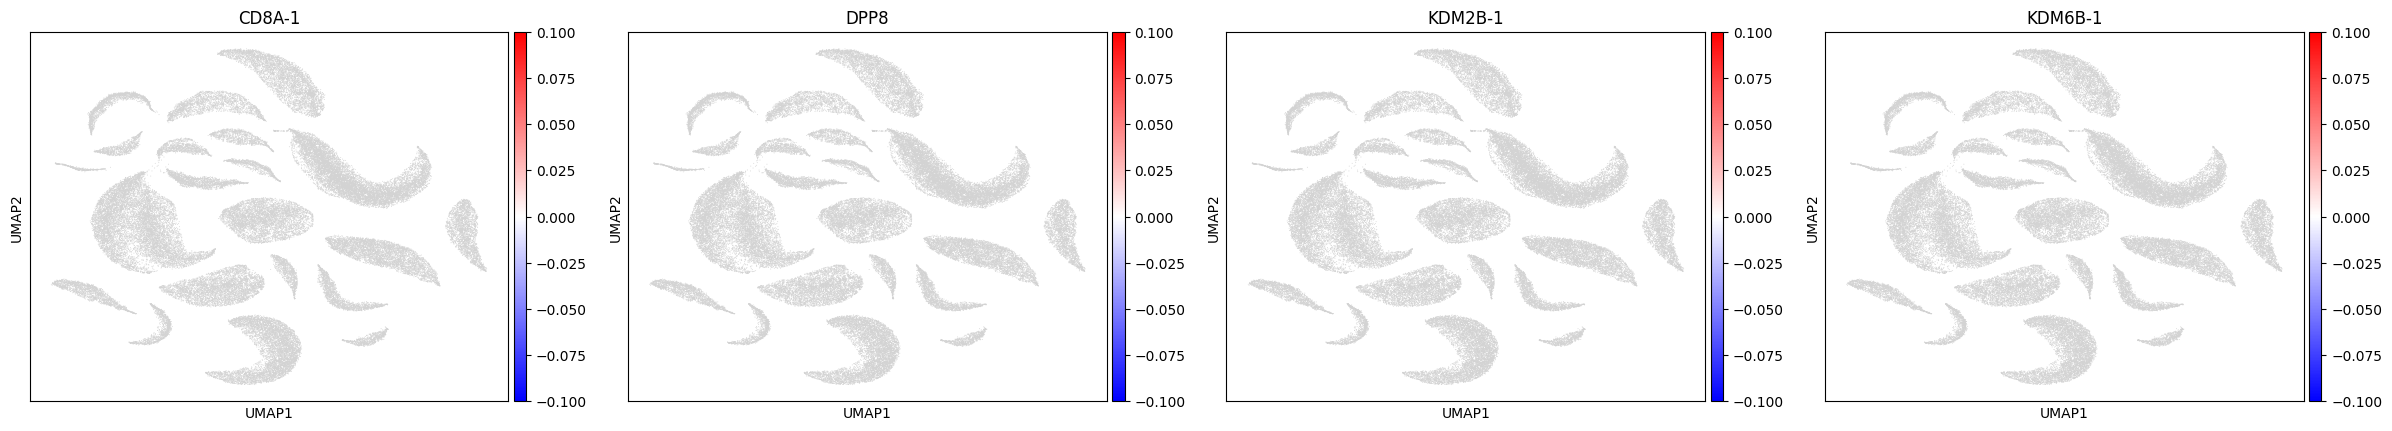

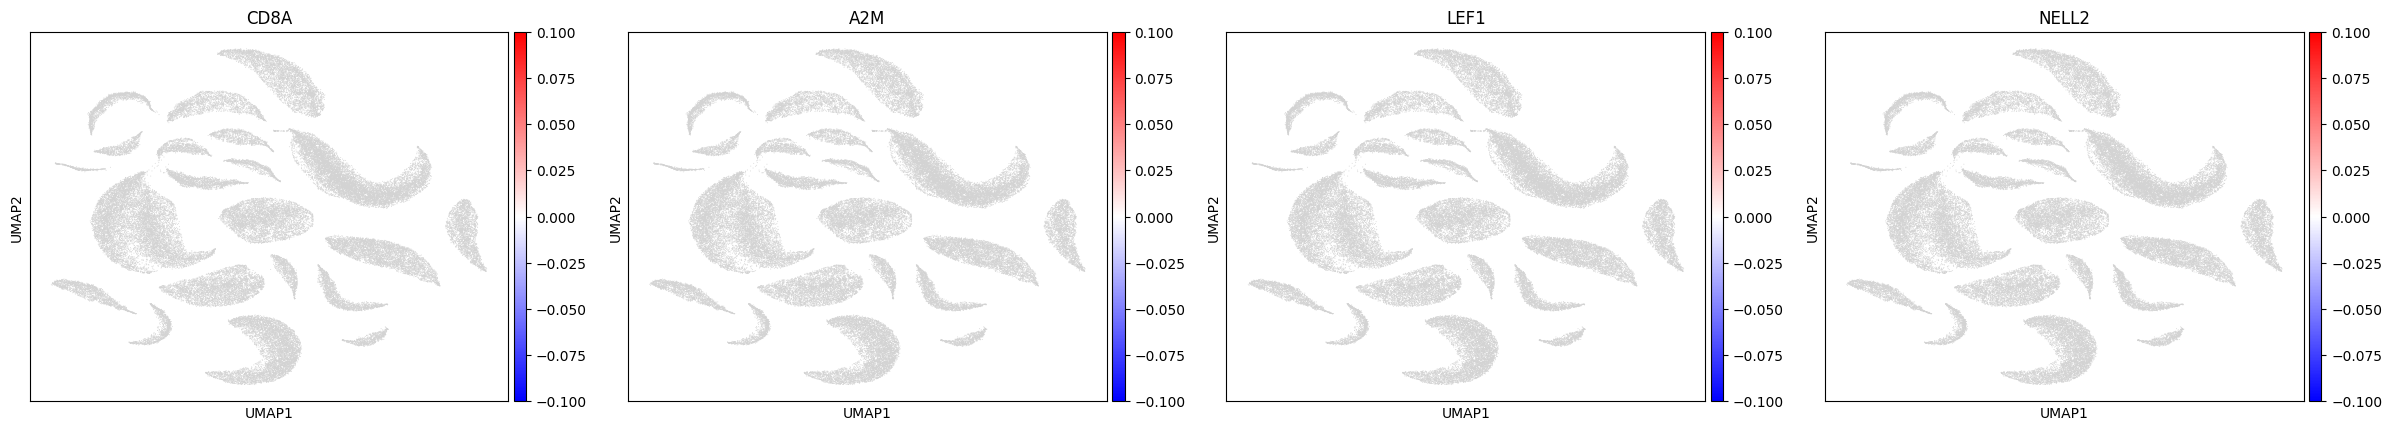

In [16]:
adatas_all_orig = [adata_atac,adata_gex]
cd8t_specific = [
    ['CD8A-1','DPP8','KDM2B-1','KDM6B-1'],
    ['CD8A','A2M','LEF1','NELL2'],
]
mods = ['ATAC','Gene']
for mjt in ['CD8_T_cells']:
    print(mjt)
    for ii in range(2):
        adata_all.obs[cd8t_specific[ii]] = adatas_all_orig[ii][:,cd8t_specific[ii]].X
        sc.pl.umap(adata_all,color=cd8t_specific[ii],cmap='bwr',show=True,save=f'{mjt}_{mods[ii]}.png')


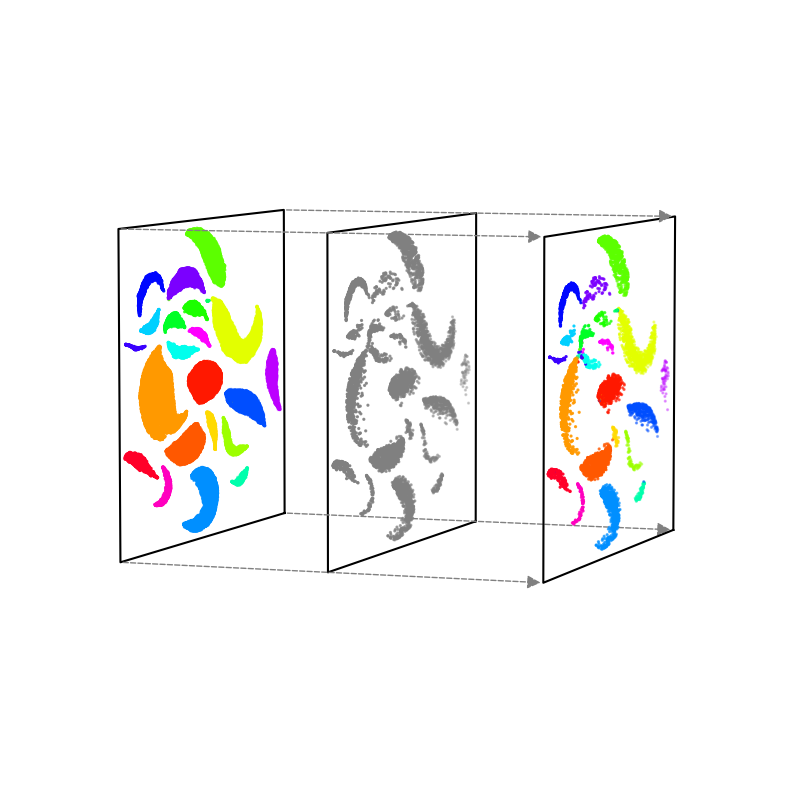

In [18]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

save_fig = False

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)
from matplotlib.colors import to_hex
type_cl_dict = {}
batch_name = test_batch
for x,y in zip(adata_all[adata_all.obs['batch']!=batch_name].obs['label'].astype('category').cat.categories,
               plt.get_cmap('gist_rainbow')(np.linspace(0, 1, len(adata_all.obs['label'].unique()))).tolist()):
    type_cl_dict[x] = to_hex(y)


new_cmap = adata_all[adata_all.obs['batch']!=batch_name].obs['label'].map(type_cl_dict).values
new_cmap_bct = adata_all[adata_all.obs['batch']==batch_name].obs['predicted_label'].map(type_cl_dict).values

size_umap = 120000 / adatas[0].shape[0]
                                                                                    
fig = plt.figure(figsize=[20,10])
ax = plt.axes(projection="3d")
np.random.seed(0)
ax.scatter3D(1, adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,1], color=new_cmap,s=size_umap, zorder=1)
ax.scatter3D(2, adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,1], color='gray',s=size_umap, zorder=2)
ax.scatter3D(3, adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,1], color=new_cmap_bct,s=size_umap, zorder=3)
all_dots_x = adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,0]
all_dots_y = adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,1]
u_l = [all_dots_x.min()-1,all_dots_y.max()+1]
u_r = [all_dots_x.max()+1,all_dots_y.max()+1]
l_l = [all_dots_x.min()-1,all_dots_y.min()-1]
l_r = [all_dots_x.max()+1,all_dots_y.min()-1]

ax.plot3D([1,1,1,1,1],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=1)
ax.plot3D([2,2,2,2,2],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=2)
ax.plot3D([3,3,3,3,3],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=3)

ax.view_init(5, -70)
# Hide grid lines
ax.grid(False)
plt.axis('off')
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

for y,z in zip([l_r[0],l_l[0],u_l[0],u_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1]]):
  a = Arrow3D([1, 3], [y, y], 
              [z, z], mutation_scale=20, ls="dashed",
              lw=1, arrowstyle="-|>", color="grey")
  ax.add_artist(a)

if save_fig:
    plt.savefig('./figures/ATACseq_transfer_cell_type.png',dpi=800)
plt.show()